In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
print(os.listdir('UCI_HAR_Dataset'))
# Чтобы ошибки не мозолили глаза
import warnings
warnings.filterwarnings('ignore')

['.DS_Store', 'test', 'features.txt', 'activity_labels.txt', 'UCI_HAR_Dataset', '1(1)-Copy1.ipynb', 'features_info.txt', 'train', 'README.txt', '.ipynb_checkpoints']


In [3]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
  
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [6]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras.models import Sequential
from keras.layers import LSTM ,Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [7]:
train_path = "UCI_HAR_Dataset/train/"
test_path = "UCI_HAR_Dataset/test/"
features_path = "UCI_HAR_Dataset/features.txt"

In [8]:
features = []
with open(features_path) as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))
print("No. of unique features:{}".format(len(set(features))))

No of Features: 561
No. of unique features:477


In [9]:
#LABELS
labels = {1: 'WALKING', 
          2:'WALKING_UPSTAIRS',
          3:'WALKING_DOWNSTAIRS',
          4:'SITTING',
          5:'STANDING',
          6:'LAYING'}

In [10]:
re=[]
for i , f in enumerate(features):
    for j in range(i+1 , len(features)):
        if features[i]==features[j] and features[i] not in re:
            re.append(features[i])

In [11]:
for i , f in enumerate(features):
    features[i] = ''.join(e for e in f if e not in ['(',')' , '-' , ',']) 

In [12]:
train = pd.read_csv(train_path + "X_train.txt" , delim_whitespace=True ,header=None)
train.columns = features
train['subject'] = pd.read_csv(train_path + 'subject_train.txt' , header=None , squeeze=True)
test = pd.read_csv(test_path + "X_test.txt" , delim_whitespace=True ,header=None)
test.columns = features
test['subject'] = pd.read_csv(test_path + 'subject_test.txt' , header=None , squeeze=True)

In [13]:
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 5)
train.head(100)

tBodyAccmeanX  tBodyAccmeanY  ...  angleZgravityMean  subject
0        0.288585      -0.020294  ...          -0.058627        1
1        0.278419      -0.016411  ...          -0.054317        1
..            ...            ...  ...                ...      ...
98       0.284317      -0.027206  ...           0.031442        1
99       0.221727      -0.024377  ...           0.048844        1

[100 rows x 562 columns]

In [ ]:
test.head()

tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0       0.257178      -0.023285      -0.014654     -0.938404     -0.920091   
1       0.286027      -0.013163      -0.119083     -0.975415     -0.967458   
2       0.275485      -0.026050      -0.118152     -0.993819     -0.969926   
3       0.270298      -0.032614      -0.117520     -0.994743     -0.973268   
4       0.274833      -0.027848      -0.129527     -0.993852     -0.967445   

   tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  tBodyAccmaxX  \
0     -0.667683     -0.952501     -0.925249     -0.674302     -0.894088   
1     -0.944958     -0.986799     -0.968401     -0.945823     -0.894088   
2     -0.962748     -0.994403     -0.970735     -0.963483     -0.939260   
3     -0.967091     -0.995274     -0.974471     -0.968897     -0.938610   
4     -0.978295     -0.994111     -0.965953     -0.977346     -0.938610   

   tBodyAccmaxY  tBodyAccmaxZ  tBodyAccminX  tBodyAccminY  tBodyAccminZ  \
0     -0.554577     -0.466223      0.717208      0.635502      0.789497   
1     -0.554577     -0.806013      0.768031      0.683698      0.796706   
2     -0.568512     -0.799116      0.848305      0.667864      0.822442   
3     -0.568512     -0.799116      0.848305      0.667864      0.822442   
4     -0.560831     -0.825894      0.849179      0.670700      0.829897   

   tBodyAccsma  tBodyAccenergyX  tBodyAccenergyY  tBodyAccenergyZ  \
0    -0.877764        -0.997766        -0.998414        -0.934345   
1    -0.969097        -0.999580        -0.999646        -0.997720   
2    -0.976782        -0.999954        -0.999570        -0.998720   
3    -0.974418        -0.999953        -0.999330        -0.998933   
4    -0.975283        -0.999954        -0.999467        -0.998823   

   tBodyAcciqrX  tBodyAcciqrY  tBodyAcciqrZ  tBodyAccentropyX  \
0     -0.975669     -0.949824     -0.830478         -0.168084   
1     -0.994006     -0.973637     -0.950720         -0.302437   
2     -0.993456     -0.974266     -0.964976         -0.617916   
3     -0.995236     -0.978739     -0.969982         -0.749578   
4     -0.993498     -0.967032     -0.976257         -0.590576   

   tBodyAccentropyY  tBodyAccentropyZ  tBodyAccarCoeffX1  tBodyAccarCoeffX2  \
0         -0.378996          0.246217           0.521204          -0.487793   
1         -0.348243         -0.404785           0.507492          -0.156495   
2         -0.695490         -0.536693           0.242147          -0.114997   
3         -0.899226         -0.553813           0.174684          -0.051332   
4         -0.740206         -0.799419           0.115570          -0.028923   

   tBodyAccarCoeffX3  tBodyAccarCoeffX4  tBodyAccarCoeffY1  tBodyAccarCoeffY2  \
0           0.482280          -0.045462           0.211955          -0.134894   
1           0.040674           0.272991           0.197566          -0.194556   
2           0.032703           0.192385          -0.011945          -0.063363   
3           0.034200           0.153639           0.030767          -0.129277   
4          -0.032804           0.294340           0.000630          -0.045272   

   tBodyAccarCoeffY3  tBodyAccarCoeffY4  tBodyAccarCoeffZ1  tBodyAccarCoeffZ2  \
0           0.130858          -0.014176          -0.105971           0.073544   
1           0.411411          -0.340466           0.077555          -0.084024   
2           0.470819          -0.507395           0.188536          -0.231575   
3           0.446100          -0.419496           0.271493          -0.225769   
4           0.168419          -0.068156           0.074384           0.027138   

   tBodyAccarCoeffZ3  tBodyAccarCoeffZ4  tBodyAcccorrelationXY  \
0          -0.171516           0.040063               0.076989   
1           0.035305          -0.010083              -0.104983   
2           0.632120          -0.550708               0.305653   
3           0.416376          -0.286445              -0.063792   
4          -0.145931          -0.050197        

In [15]:
y_train = pd.read_csv(train_path + 'y_train.txt' , names=['Activity'] , squeeze=True)
y_test = pd.read_csv(test_path + 'y_test.txt' , names=['Activity'] , squeeze=True)

In [16]:
train['Activity']= y_train
test['Activity'] = y_test
train['ActivityName'] = y_train.map(labels)
test['ActivityName']  = y_test.map(labels)

# Анализ

In [17]:
print("The number of missing values in Training Data:" , train.isnull().values.sum())
print("The number of missing values in Testing Data:" , test.isnull().values.sum())

The number of missing values in Training Data: 0
The number of missing values in Testing Data: 0


In [18]:
print("The number of duplicate values in Training Data:" , train.duplicated().sum())
print("The number of duplicate values in Testing Data:" , test.duplicated().sum())

The number of duplicate values in Training Data: 0
The number of duplicate values in Testing Data: 0


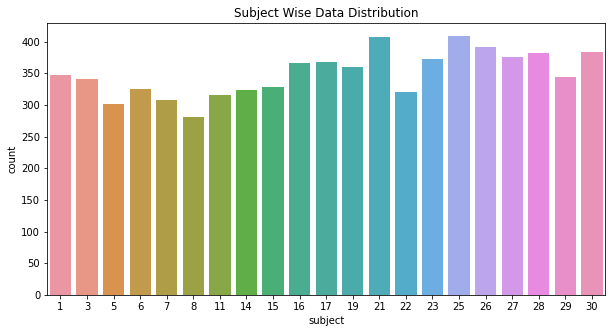

In [30]:
plt.figure(figsize=(10,5))
plt.title('Subject Wise Data Distribution')
sns.countplot(x='subject' , data=train )
plt.show()

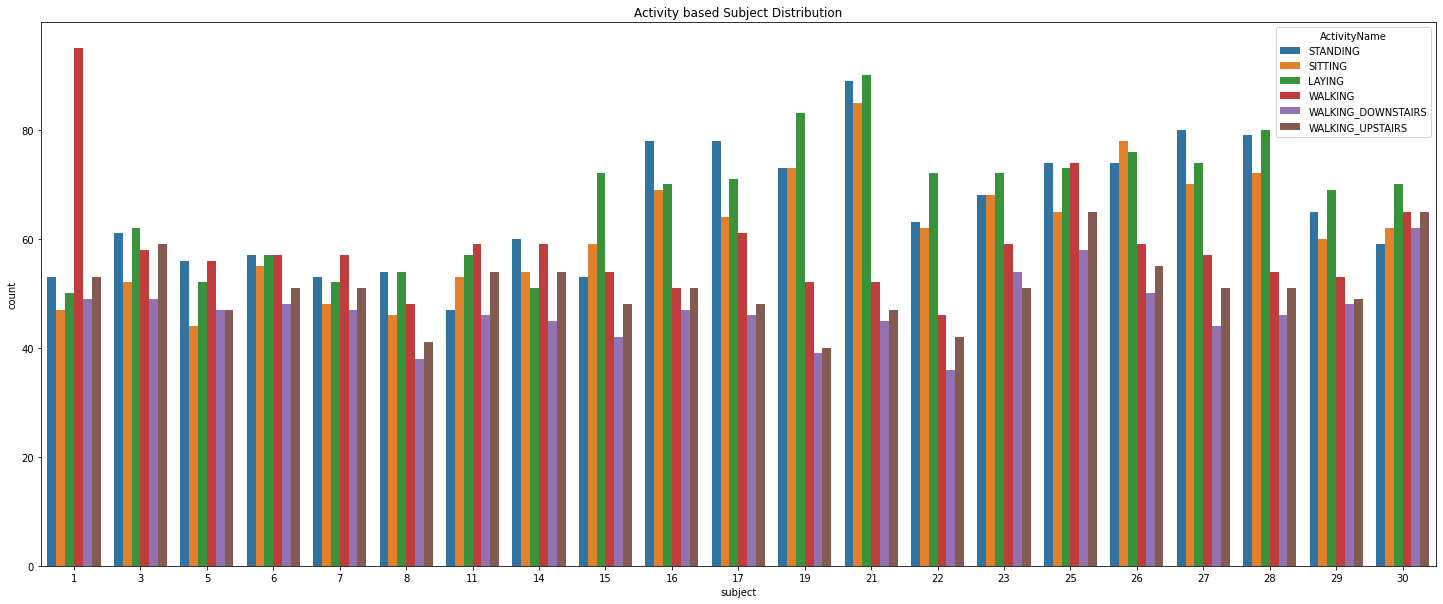

In [35]:
plt.figure(figsize=(25,10))
plt.title('Activity based Subject Distribution')
sns.countplot(x='subject' , hue='ActivityName', data=train )
plt.show()

In [38]:
accFeat=[]
for feat in features:
    if feat.find('BodyAcc') != -1 and feat.find('Magmean') !=-1 and feat.find('Freq')==-1:
        accFeat.append(feat)

In [39]:
def plotFacetGrid(feature, height):
    
    plt.figure(figsize=(10,10))
    facetgrid=sns.FacetGrid(train , hue='ActivityName',height=height,aspect=3)
    facetgrid.map(sns.distplot ,feature, hist=False).add_legend()
    plt.show()

<Figure size 720x720 with 0 Axes>

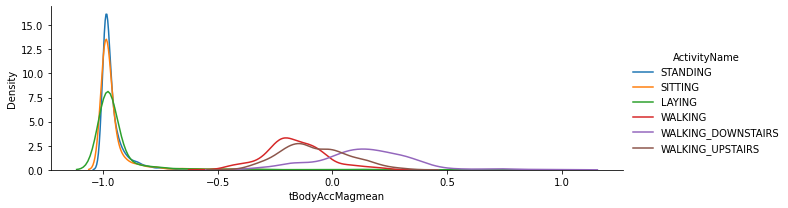

<Figure size 720x720 with 0 Axes>

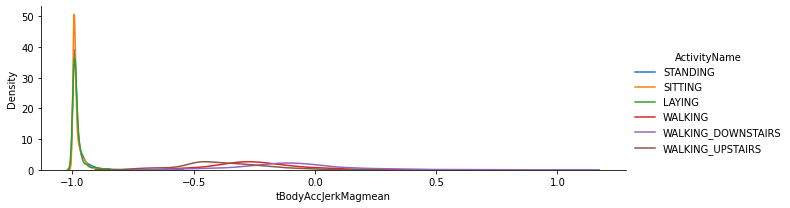

<Figure size 720x720 with 0 Axes>

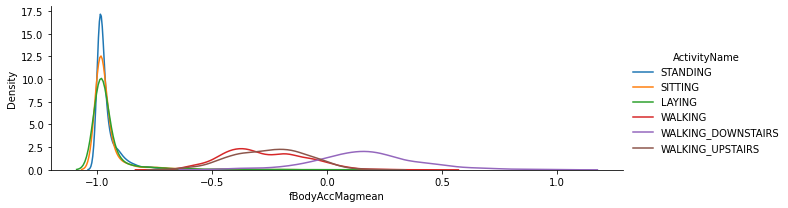

<Figure size 720x720 with 0 Axes>

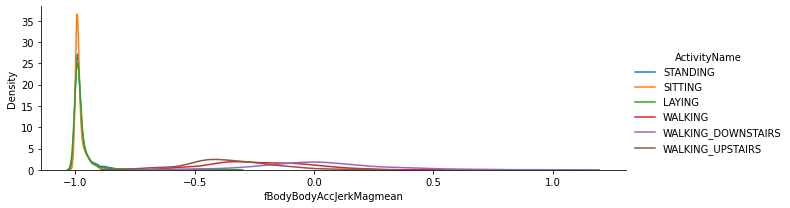

In [40]:
for f in accFeat:
    plotFacetGrid(f,3) 

In [86]:
def boxplot(feature , ylabel):
    #print(train);
    plt.figure(figsize=(5,5))
    sns.boxplot(x='ActivityName', y=feature, data=test , showfliers= False )
    plt.ylabel(ylabel)
    plt.axhline(y=-0.8, xmin=0.1, xmax=0.9,dashes=(5,5), c='g') #line separating both type of activities
    plt.xticks(rotation=90)
    

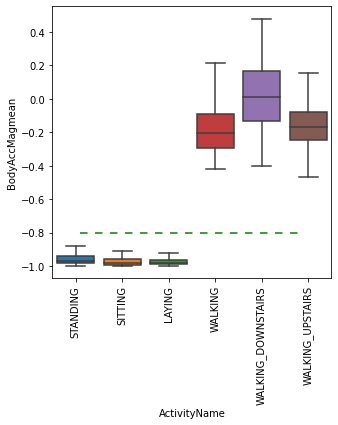

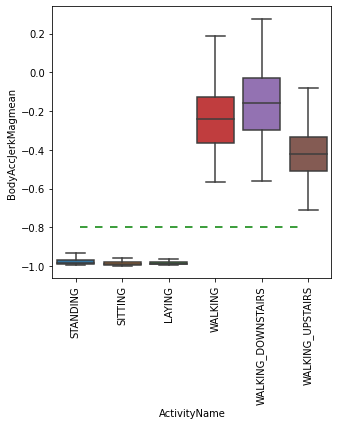

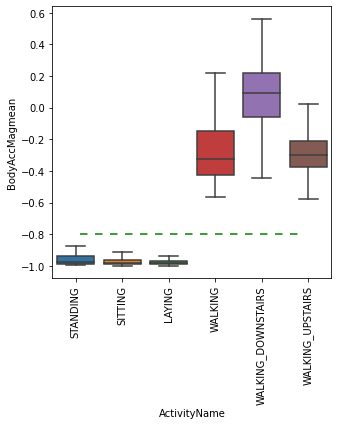

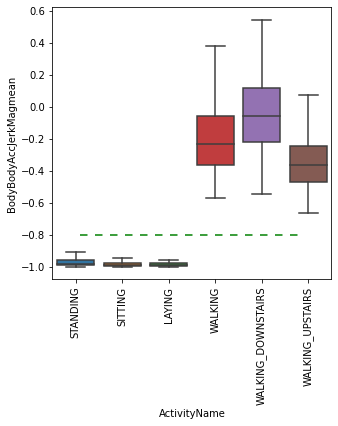

In [87]:
for f in accFeat:
    boxplot(f , f[1:])

Dimentionality Reduction using T-SNE

In [92]:
from sklearn.manifold import TSNE

In [93]:
def plotTsne(X,y,perplexity):
    
    #performing dim reduction
    X_reduce = TSNE(verbose=2, perplexity=perplexity).fit_transform(X)
    
    print('Creating plot for this t-sne visualization..')
    data={'x':X_reduce[:,0],
          'y':X_reduce[:,1],
         'label':y}
    #preparing dataframe from reduced data
    df = pd.DataFrame(data)
    
    #draw the plot
    sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
    
    plt.title("perplexity : {}".format(perplexity))
    img_name = 'TSNE_perp_{}.png'.format(perplexity)
    print('saving this plot as image in present working directory...')
    plt.savefig(img_name)
    plt.show()
    print('Done')
    

In [94]:
X= train.drop(['ActivityName'],axis=1)
y= train['ActivityName']
perplexity=[2,5,10]

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.004s...
[t-SNE] Computed neighbors for 7352 samples in 1.942s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.685862
[t-SNE] Computed conditional probabilities in 0.026s
[t-SNE] Iteration 50: error = 124.5447235, gradient norm = 0.0410256 (50 iterations in 1.439s)
[t-SNE] Iteration 100: error = 104.7700043, gradient norm = 0.0304807 (50 iterations in 0.886s)
[t-SNE] Iteration 150: error = 98.1721573, gradient norm = 

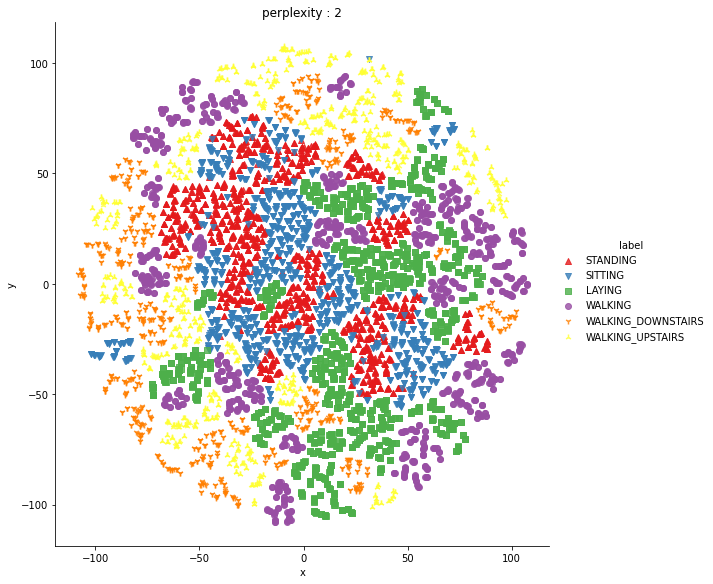

Done
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.002s...
[t-SNE] Computed neighbors for 7352 samples in 1.392s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.127762
[t-SNE] Computed conditional probabilities in 0.034s
[t-SNE] Iteration 50: error = 112.7252350, gradient norm = 0.0378081 (50 iterations in 1.165s)
[t-SNE] Iteration 100: error = 92.7426605, gradient norm = 0.0193221 (50 iterations in 0.914s)
[t-SNE] Iteration 150: error = 86.9444046, gradient no

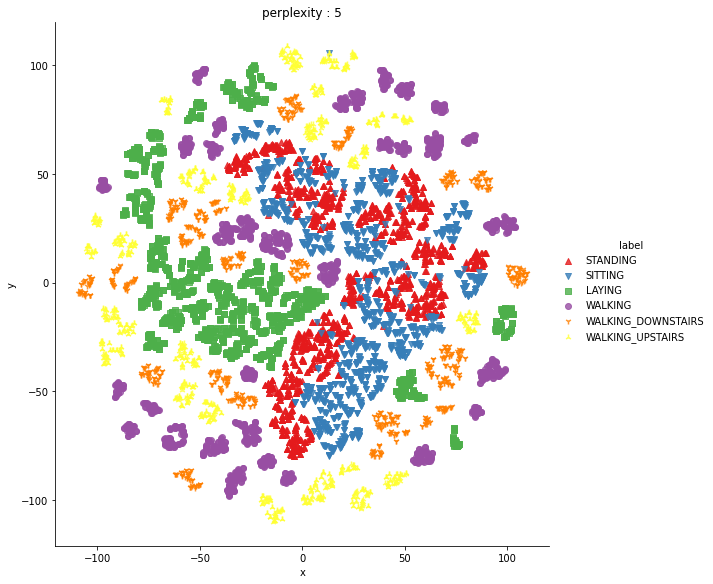

Done
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.002s...
[t-SNE] Computed neighbors for 7352 samples in 1.423s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.357802
[t-SNE] Computed conditional probabilities in 0.063s
[t-SNE] Iteration 50: error = 103.4712372, gradient norm = 0.0381116 (50 iterations in 1.329s)
[t-SNE] Iteration 100: error = 84.0282288, gradient norm = 0.0147827 (50 iterations in 1.132s)
[t-SNE] Iteration 150: error = 78.7962570, gradient no

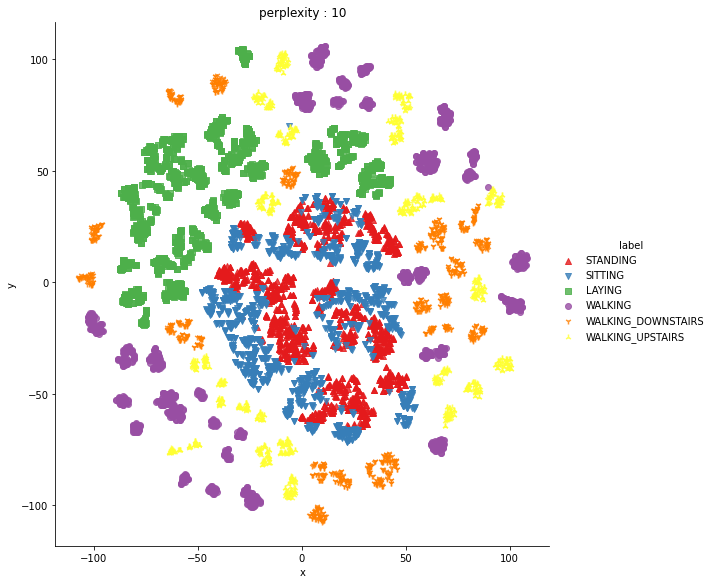

Done


In [95]:
for p in perplexity:
    plotTsne(X,y,perplexity=p)

In [96]:
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

"-----------------------RAW DATA--------------------------------------"

# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [97]:
path= "UCI_HAR_Dataset/UCI_HAR_Dataset/"

In [98]:

def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

"----------------------------LOAD SIGNAL---------------------------------------------"


def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = path+subset+'/Inertial Signals/'+signal+'_'+subset+'.txt'
        signals_data.append(
            _read_csv(filename).values
        ) 

  
    return np.transpose(signals_data, (1, 2, 0))

"-------------------------CONFUSION MATRIX----------------------------------------------"


def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])


"----------------------------LOAD Y-------------------------------------------------------"



def load_y(subset):
  
    filename = path+subset+'/y_'+subset+'.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).values



"---------------------------------LOAD DATA---------------------------------------------"


def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test


"---------------------------------COUNT CLASSES--------------------------------------------"


def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [99]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [100]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

In [101]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)

print(timesteps)
print(input_dim)
print(len(X_train))

128
9
7352


In [102]:

model = Sequential()

model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))

model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

2022-06-19 18:20:42.077395: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                5376      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 6)                 198       
                                                                 
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [103]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(X_train,
          Y_train,
          batch_size=batch_size,
          validation_data=(X_test, Y_test),
          epochs=epochs)

Epoch 1/30
460/460 [==============================] - 21s 41ms/step - loss: 1.1651 - accuracy: 0.5154 - val_loss: 0.9030 - val_accuracy: 0.6705
Epoch 2/30
460/460 [==============================] - 19s 42ms/step - loss: 0.7628 - accuracy: 0.6780 - val_loss: 0.8051 - val_accuracy: 0.6712
Epoch 3/30
460/460 [==============================] - 19s 42ms/step - loss: 0.6428 - accuracy: 0.7378 - val_loss: 0.6359 - val_accuracy: 0.7716
Epoch 4/30
460/460 [==============================] - 19s 42ms/step - loss: 0.5189 - accuracy: 0.8205 - val_loss: 0.5889 - val_accuracy: 0.8079
Epoch 5/30
460/460 [==============================] - 19s 41ms/step - loss: 0.4112 - accuracy: 0.8734 - val_loss: 0.4767 - val_accuracy: 0.8402
Epoch 6/30
460/460 [==============================] - 16s 36ms/step - loss: 0.3141 - accuracy: 0.9007 - val_loss: 0.5511 - val_accuracy: 0.8548
Epoch 7/30
460/460 [==============================] - 18s 38ms/step - loss: 0.2712 - accuracy: 0.9177 - val_loss: 0.4323 - val_accuracy:

# Human Activity Recognition using Conv1D

In [ ]:

from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'UCI_HAR_Dataset/UCI_HAR_Dataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'UCI_HAR_Dataset/UCI_HAR_Dataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy



trainX, trainy, testX, testy = load_dataset()
verbose, epochs, batch_size = 2, 10, 32
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

#cnn model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu',input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit network
model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model
_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print('Test accuracy:', accuracy)

# HAR: EDA & Data Visualisation

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('UCI_HAR_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl

UCI_HAR_Dataset/.DS_Store
UCI_HAR_Dataset/features.txt
UCI_HAR_Dataset/activity_labels.txt
UCI_HAR_Dataset/1(1)-Copy1.ipynb
UCI_HAR_Dataset/features_info.txt
UCI_HAR_Dataset/README.txt
UCI_HAR_Dataset/test/subject_test.txt
UCI_HAR_Dataset/test/X_test.txt
UCI_HAR_Dataset/test/y_test.txt
UCI_HAR_Dataset/test/Inertial Signals/total_acc_y_test.txt
UCI_HAR_Dataset/test/Inertial Signals/total_acc_x_test.txt
UCI_HAR_Dataset/test/Inertial Signals/body_acc_x_test.txt
UCI_HAR_Dataset/test/Inertial Signals/body_acc_y_test.txt
UCI_HAR_Dataset/test/Inertial Signals/body_gyro_y_test.txt
UCI_HAR_Dataset/test/Inertial Signals/body_gyro_x_test.txt
UCI_HAR_Dataset/test/Inertial Signals/total_acc_z_test.txt
UCI_HAR_Dataset/test/Inertial Signals/body_gyro_z_test.txt
UCI_HAR_Dataset/test/Inertial Signals/body_acc_z_test.txt
UCI_HAR_Dataset/UCI_HAR_Dataset/features.txt
UCI_HAR_Dataset/UCI_HAR_Dataset/1(1).ipynb
UCI_HAR_Dataset/UCI_HAR_Dataset/activity_labels.txt
UCI_HAR_Dataset/UCI_HAR_Dataset/features_info

Data Pipeline

In [15]:
# load a single file as a numpy array
def load_file(filepath):
    df = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return df.values

# load a list of files into a 3D array of [observations, timesteps, features(x,y,z)]
def load_group(files, prefix=''):
    loaded = list()
    for f in files:
        data = load_file(prefix + f)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    files = list()
    # body acceleration
    files += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    files += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # total acceleration
    files += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # load input data
    X = load_group(files, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

def load_dataset(prefix=''):
    # load all train
    X_train, y_train = load_dataset_group('train', prefix)
    # load all test
    X_test, y_test = load_dataset_group('test', prefix)
    
    """
    # zero-offset class values
    y_train = y_train - 1
    y_test = y_test - 1
    # one hot encode y
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    """
    
    print(f"""Dataset loaded.
Training Set:
X_train {X_train.shape} y_train {y_train.shape}
Test Set:
X_test {X_test.shape} y_test {y_test.shape}""")
    return X_train, y_train, X_test, y_test

In [16]:
X_train, y_train, X_test, y_test = load_dataset(prefix="UCI_HAR_Dataset/")

Dataset loaded.
Training Set:
X_train (7352, 128, 9) y_train (7352, 1)
Test Set:
X_test (2947, 128, 9) y_test (2947, 1)


In [17]:
activity = {
        1: 'Walking',
        2: 'Walking Upstairs',
        3: 'Walking Downstairs',
        4: 'Sitting',
        5: 'Standing',
        6: 'Laying'}
def activities(obs):
    return activity[int(y_train[obs])]

In [18]:
def features(feature):
    f={"Body acceleration": 0, "Gyro": 1, "Total acceleration": 2}
    return f[feature]

In [19]:
# Example for each activity
# Example for each activity
sample=[777, 666, 818, 0,6666,66]
[activity[int(y_train[i])] for i in sample]

['Walking',
 'Walking Upstairs',
 'Walking Downstairs',
 'Standing',
 'Sitting',
 'Laying']

In [20]:
activity

{1: 'Walking',
 2: 'Walking Upstairs',
 3: 'Walking Downstairs',
 4: 'Sitting',
 5: 'Standing',
 6: 'Laying'}

Data Visualisation


Feature Signals (xyz)

In [21]:
# Grab values for graphs
def get_values(y_values, T, N, f_s, sample_rate):
    
    y_values = y_values
    x_values = [sample_rate * kk for kk in range(0,len(y_values))]
    #print(y_values)
    #print (x_values, y_values)
    return x_values, y_values

In [22]:
# Display x,y,z as separate lines for each feature
def signal_viz(obs):
    N = 128 # number of timesteps
    f_s = 50 # overlapped percentage
    t_n = 2.56 # time
    T = t_n / N
    sample_rate = 1 / f_s
    
    labels = ['x', 'y', 'z']
    colors = ['r', 'g', 'b']
    suptitle = "{}"
    graph_name="graph/Signals {}.png" 
    xlabel = 'Время'
    ylabel = 'Амплитуда'
    axtitles = ['Сигнал ускорения тела', 'Сигнал угловой скорости', 'Сигнал ускорения от акселерометра ']
    activity_name = activities(obs)
    
    sns.set(style="white", font_scale = 1.7)
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,24))


    for comp_no in range(0,9):
            col_no = comp_no // 3
            plot_no = comp_no % 3
            color = colors[plot_no]
            label = labels[plot_no]

            axtitle  = axtitles[col_no]

            ax = axes[col_no]
            ax.set_title(axtitle)
            ax.set_xlabel(xlabel)
            if col_no == 0:
                ax.set_ylabel(ylabel, fontsize=16)

            signal_component = X_train[obs][:, comp_no]
            #print (X_train[obs][:, comp_no]);
            #print (obs)
            x_values, y_values = get_values(signal_component, T, N, f_s, sample_rate)
           # print (comp_no)
            #print(X_train[obs][:, comp_no])
            ax.plot(x_values, y_values, linestyle='-', color=color, label=label)  
            if col_no == 2:
                ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
            print(signal_component.shape)
    
    fig.suptitle(suptitle.format(activity_name))    
    plt.tight_layout()
    X_train[obs]
    plt.subplots_adjust(top=0.90, hspace=0.6)
    plt.show()    

(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)


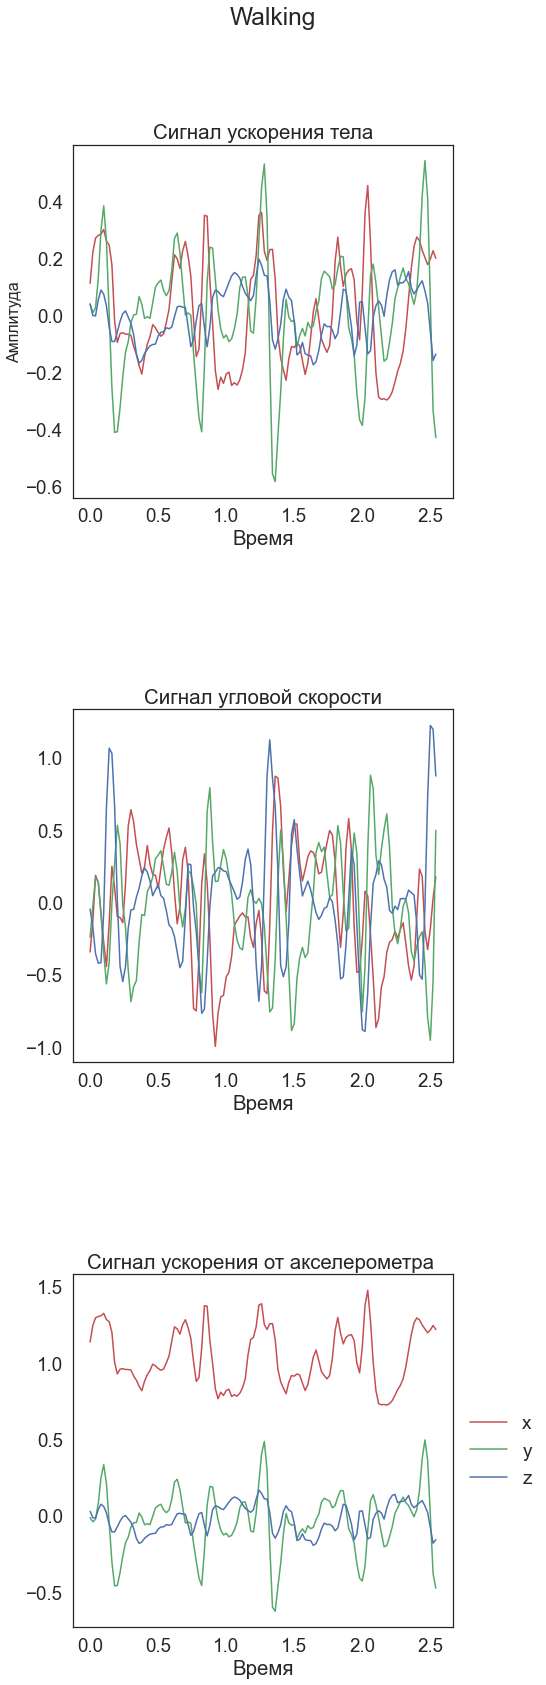

(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)


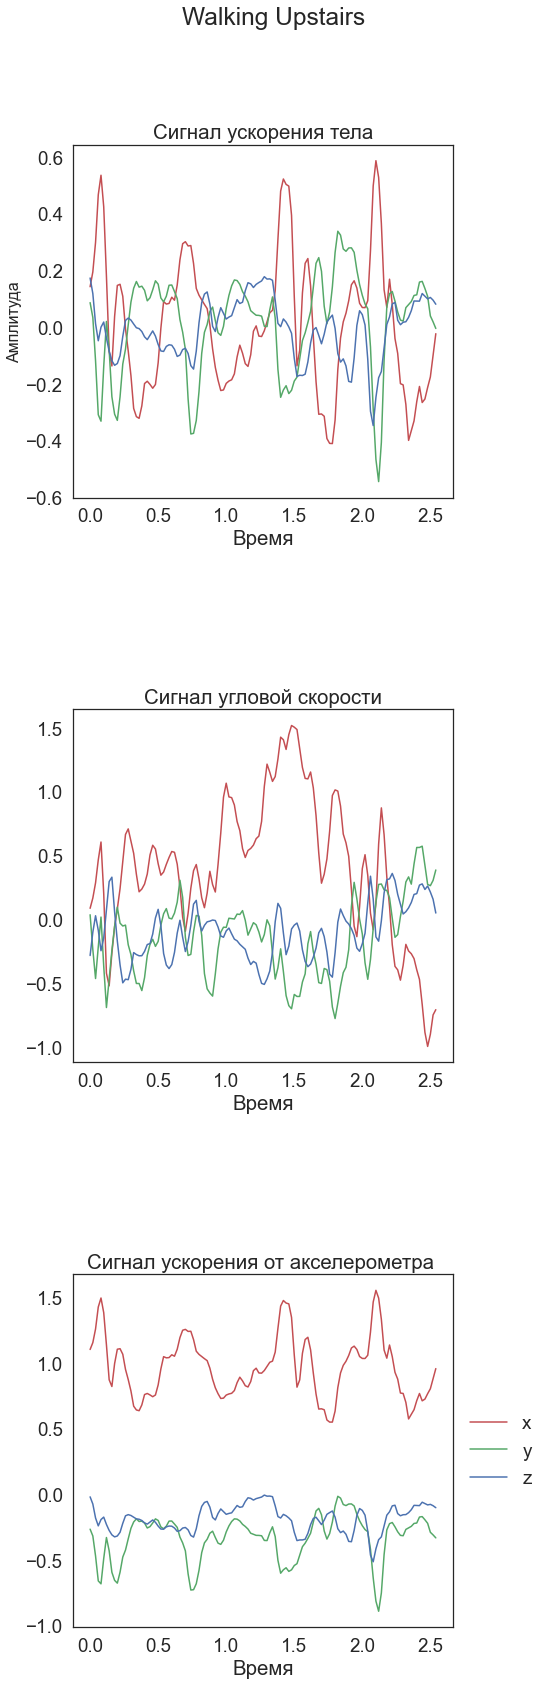

(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)


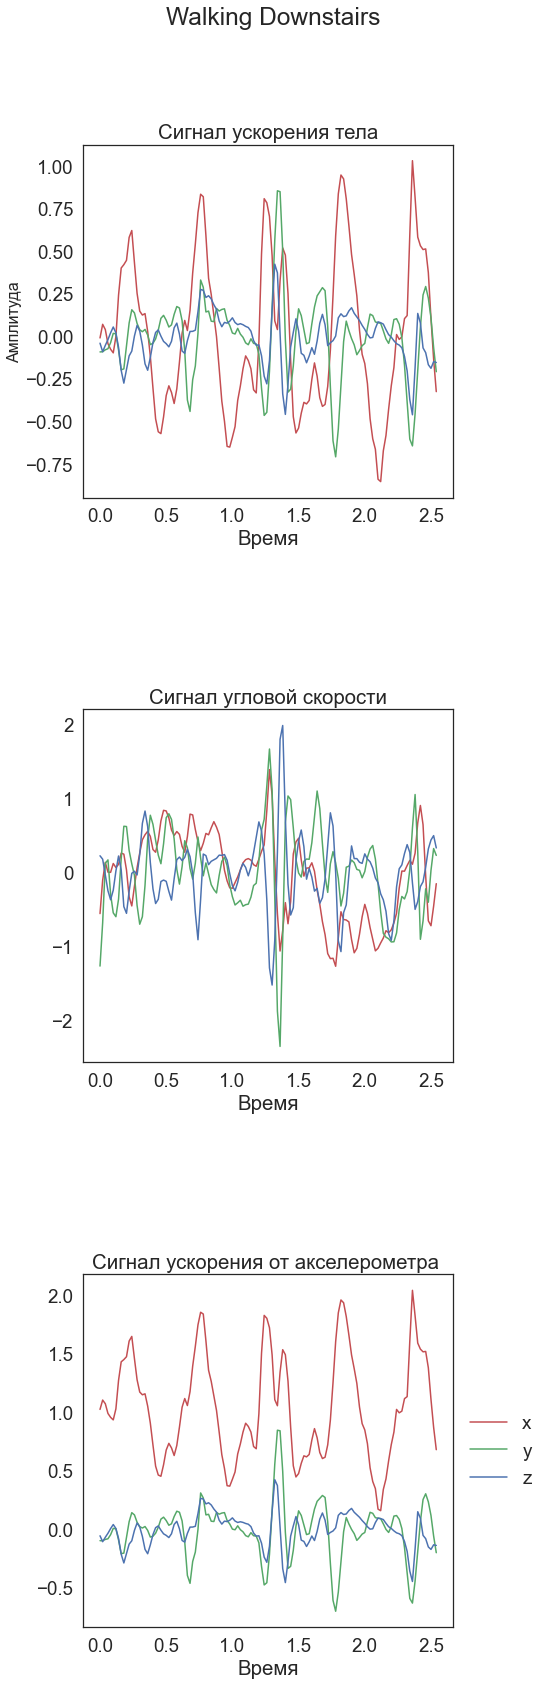

(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)


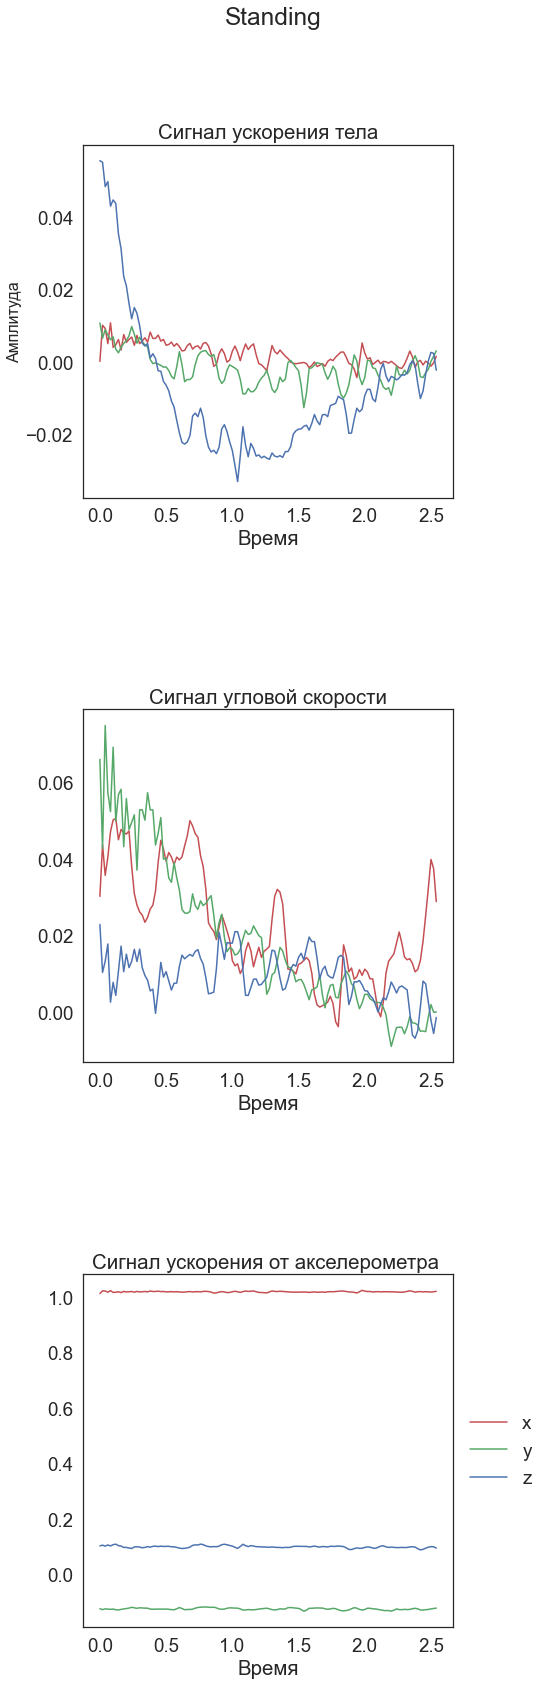

(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)


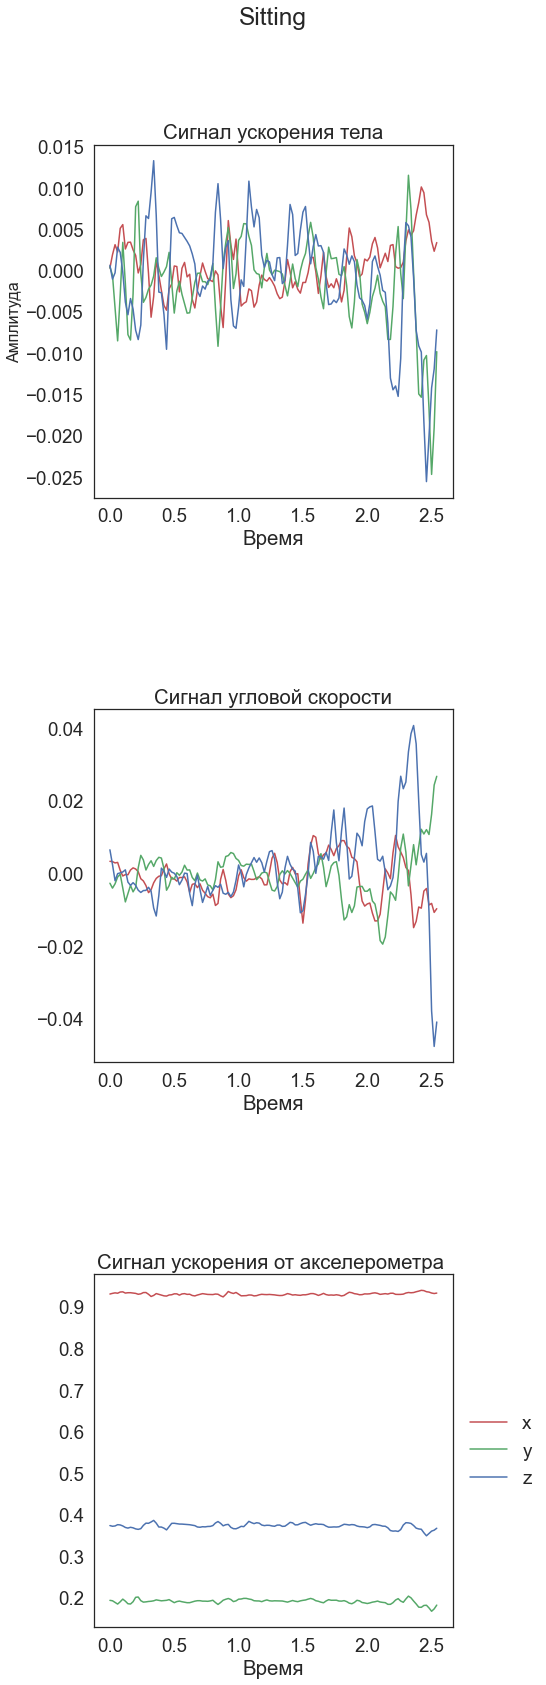

(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)


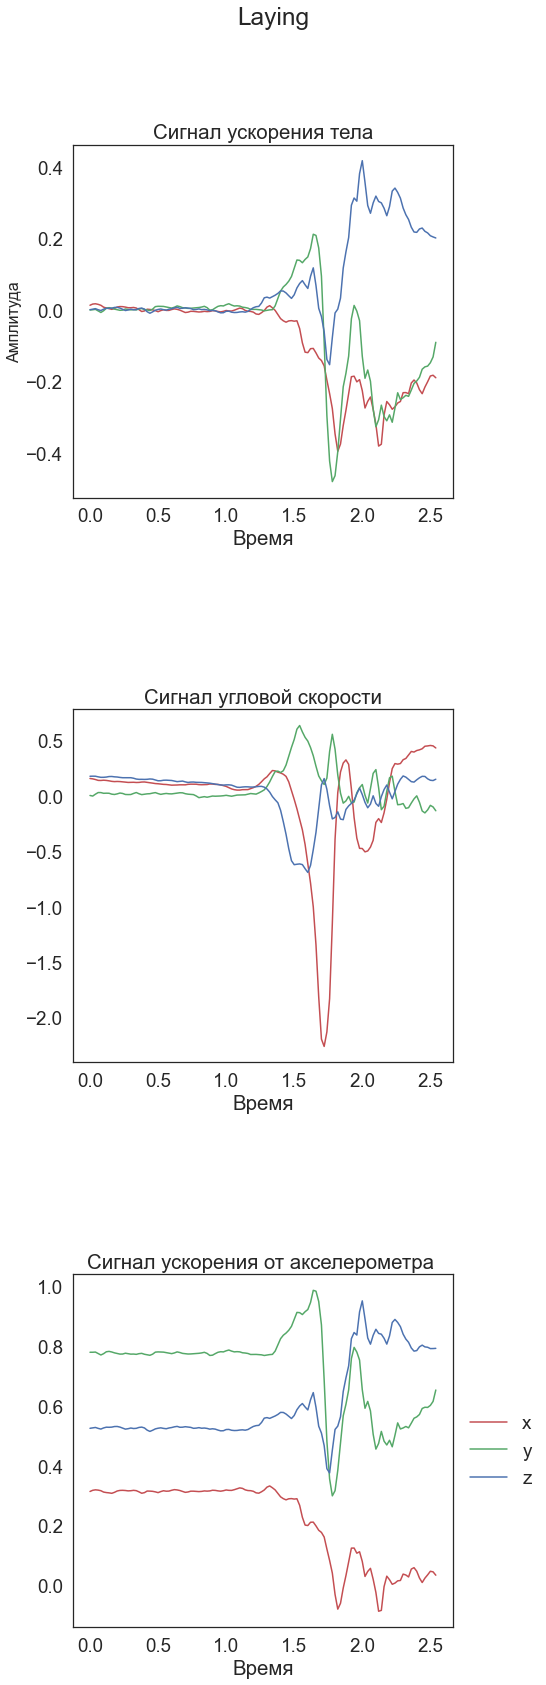

In [23]:
for i in sample:
    signal_viz(i)

In [24]:
# Plot the selected feature signal in 3D
def signal_3dviz(obs,feature):
    graph_name="graph/3D {} {}.png"
    activity_name = activities(obs)
    
    i=features(feature)
    
    sns.set(style="white", font_scale = 2)
    fig = plt.figure(figsize=(12,12))
    ax = fig.gca(projection="3d")    
    x = X_train[obs][:, i*3+0]
    y = X_train[obs][:, i*3+1]
    z = X_train[obs][:, i*3+2]
    ax.plot(x, y, z, label=feature)
    ax.legend()
    plt.title(activity_name)
    plt.xlabel("x")
    plt.ylabel("y")
    ax.set_zlabel("z")
    # Get rid of colored axes planes
    # First remove fill
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # Bonus: To get rid of the grid as well:
    ax.grid(False)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(12)
    plt.show()

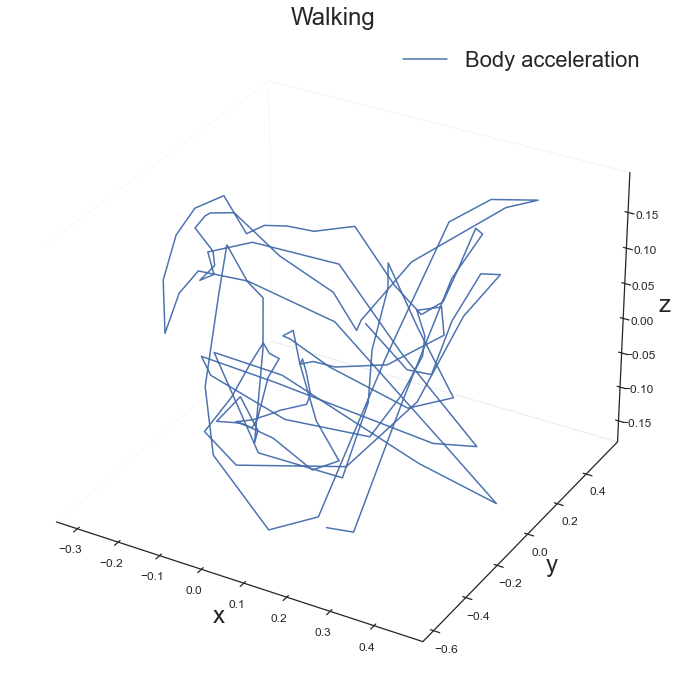

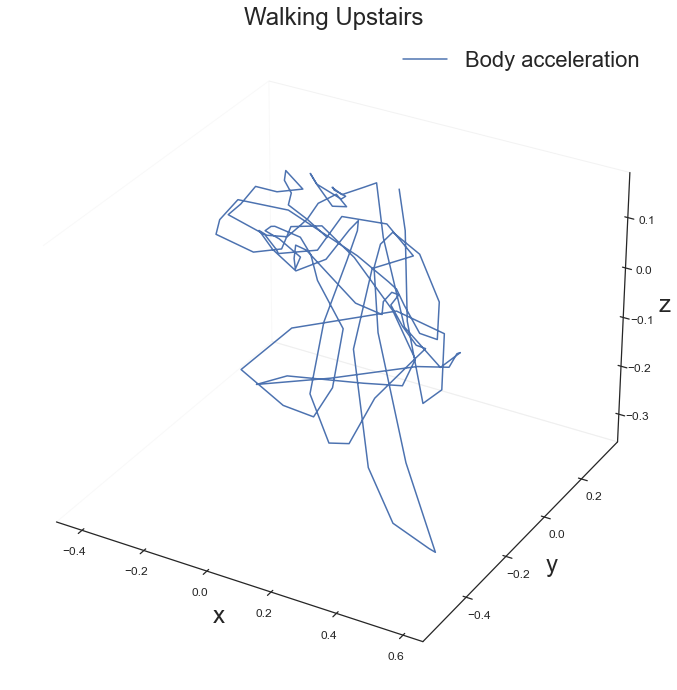

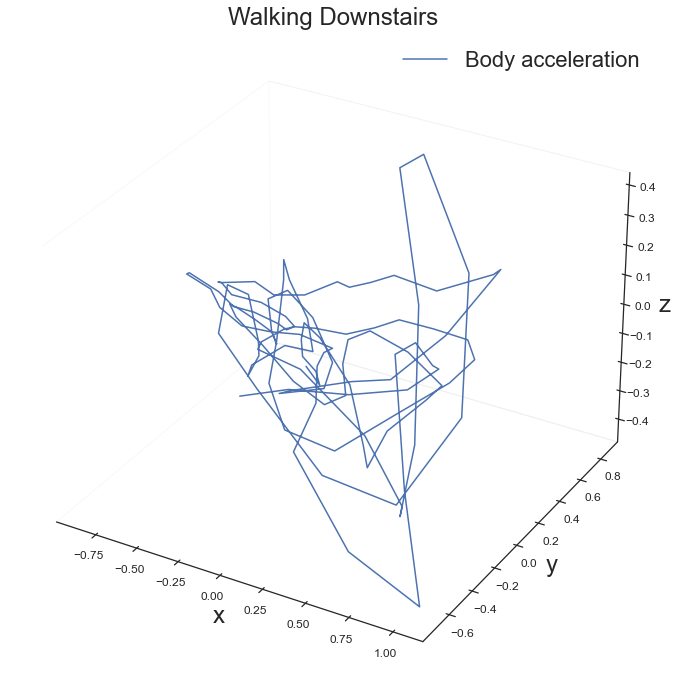

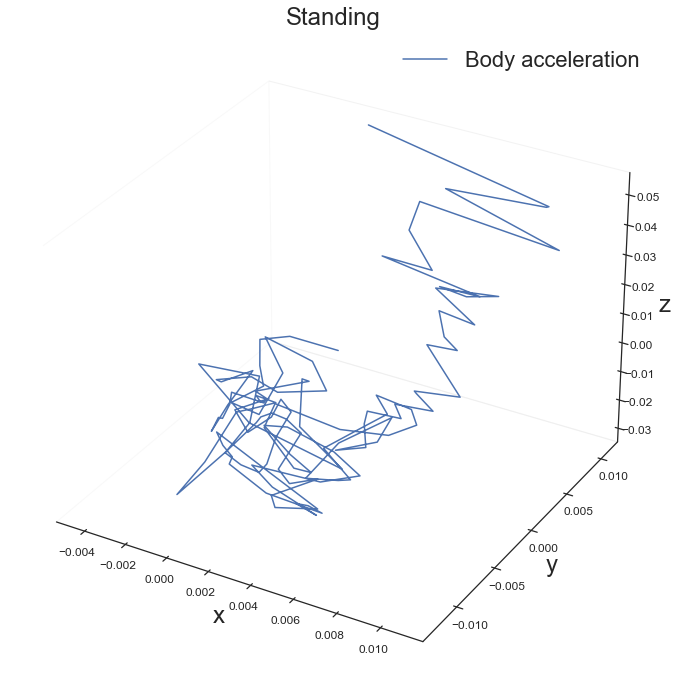

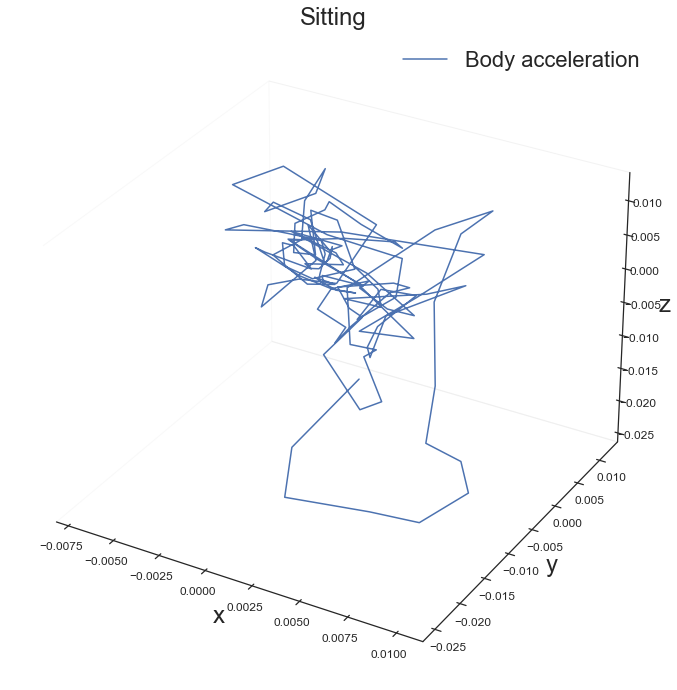

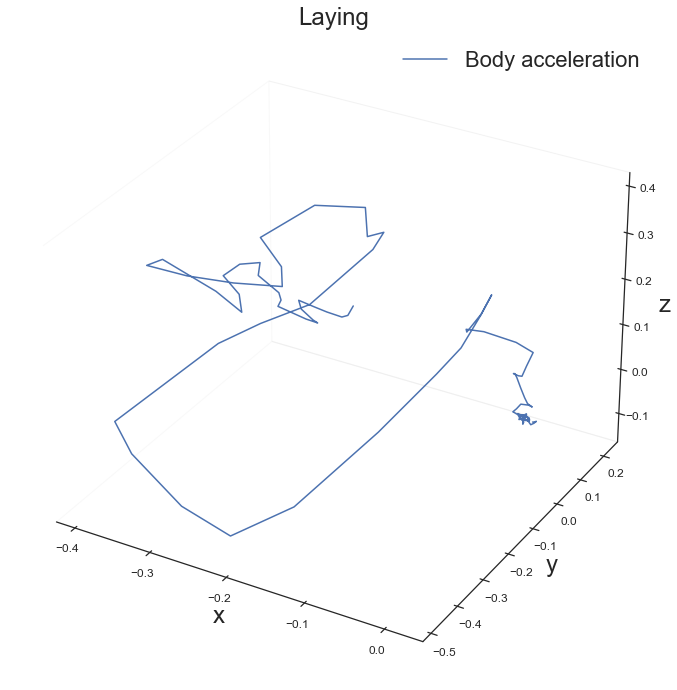

In [25]:
for i in sample:
    signal_3dviz(i, "Body acceleration")

In [38]:
# Calculate the distance of each timesteps to origin (0,0,0)
def distance_viz(obs, feature):
    graph_name="graph/distance {} {}.png"
    activity_name = activities(obs)
    
    i=features(feature)
    
    sns.set(style="white", font_scale = 2)
    fig = plt.figure(figsize=(8,6))
    x = X_train[obs][:, i*1+0]
    print (x);
    y = X_train[obs][:, i*1+1]
    z = X_train[obs][:, i*1+2]
    plt.plot((x**2+y**2+z**2)**0.5, label=feature)
    plt.legend()
    plt.title(activity_name)
    plt.xlabel("Временной шаг")
    plt.ylabel("Дистанция")
    plt.show()

[ 0.112328    0.2206156   0.2708819   0.2797005   0.284714    0.3006583
  0.2602837   0.2463765   0.177995   -0.0192786  -0.09503104 -0.06394645
 -0.06096216 -0.06619404 -0.06648409 -0.07008723 -0.1090919  -0.1374579
 -0.1765093  -0.2060699  -0.1443595  -0.1020823  -0.07464859 -0.03274602
 -0.04387229 -0.06088754 -0.07312778 -0.06470881 -0.02518818  0.02128392
  0.118785    0.2120308   0.1981013   0.1647079   0.2256412   0.2589587
  0.2077608   0.1371687  -0.01478861 -0.1444641  -0.1187813   0.07456606
  0.3504651   0.3473129   0.1221883  -0.02733755 -0.1932726  -0.2596715
 -0.2168182  -0.2384905  -0.2059836  -0.1991394  -0.2459022  -0.2358358
 -0.2445912  -0.2257274  -0.1903726  -0.1320193   0.02406748  0.1262807
  0.1394179   0.2091097   0.3507259   0.3603748   0.2244457   0.1924453
  0.2304315   0.2310235   0.1265845  -0.06905851 -0.1491195  -0.1912081
 -0.2276704  -0.15235    -0.1091179  -0.1126865  -0.09838913 -0.1059488
 -0.1584022  -0.2074355  -0.1666074  -0.07934219  0.01300053

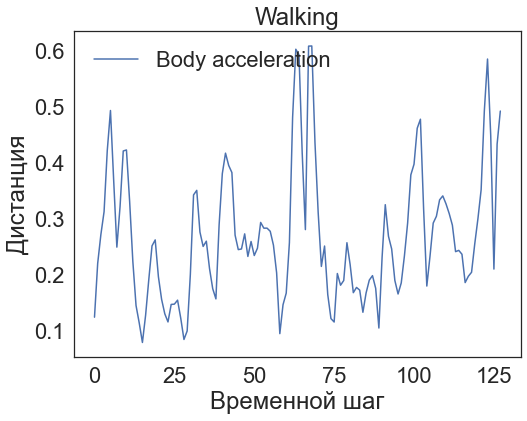

[ 0.1418874   0.1942993   0.2985301   0.4660169   0.5349412   0.4237698
  0.1785719  -0.08646092 -0.1374812   0.03717245  0.1465142   0.1504919
  0.1083636  -0.00670592 -0.08414993 -0.1713878  -0.2870741  -0.316076
 -0.3220537  -0.2780654  -0.1993297  -0.1912573  -0.2024328  -0.2159261
 -0.2026754  -0.1259561  -0.00380227  0.08950803  0.08082359  0.08305982
  0.1049154   0.09441877  0.1480206   0.2369344   0.2935407   0.3006949
  0.2856531   0.287057    0.2239482   0.1360138   0.1120454   0.09552912
  0.07966604  0.06472656  0.0071154  -0.07727022 -0.142479   -0.1876174
 -0.2240115  -0.2219244  -0.1988171  -0.1905903  -0.1860673  -0.1652251
 -0.1054848  -0.06405203 -0.09258422 -0.1292086  -0.1390147  -0.09802454
 -0.01496823  0.0038856  -0.03211246 -0.03360687 -0.01309961  0.01843285
  0.04993641  0.05895119  0.1282314   0.3093857   0.4789433   0.5217033
  0.5027245   0.4966435   0.3937767   0.1085403  -0.1371687  -0.08199427
  0.1198099   0.224432    0.2413055   0.1447189  -0.03281005

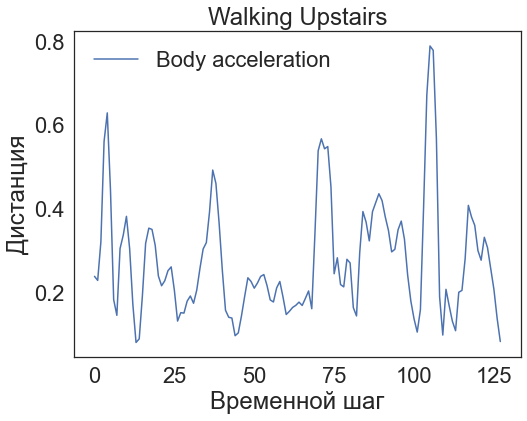

[-0.01098692  0.06906084  0.03818542 -0.04468079 -0.07744835 -0.09869658
 -0.0035343   0.2405316   0.3999581   0.4198018   0.4451909   0.5797904
  0.6202617   0.4314542   0.2511711   0.1466582   0.1235314   0.131959
  0.02708786 -0.1178274  -0.306243   -0.4865454  -0.5623215  -0.5732693
 -0.4750867  -0.3494515  -0.2922978  -0.3314399  -0.3962509  -0.310333
 -0.1532728   0.01698521  0.09183879  0.03248089  0.1522476   0.3709839
  0.5407594   0.7254152   0.8334373   0.818745    0.5896946   0.3395116
  0.2447779   0.1212825  -0.00391372 -0.1886801  -0.3821853  -0.4998177
 -0.6483292  -0.652471   -0.5944459  -0.5322671  -0.3784131  -0.2935676
 -0.1921803  -0.116537   -0.1438203  -0.192281   -0.3155897  -0.334105
 -0.03537928  0.4828279   0.8073276   0.783295    0.7030212   0.4710554
  0.08951019  0.03819977  0.3246021   0.518113    0.4755995   0.249873
 -0.143651   -0.4739753  -0.5694781  -0.5405438  -0.453672   -0.3895486
 -0.3986671  -0.378561   -0.2557323  -0.1577406  -0.2357201  -0.362

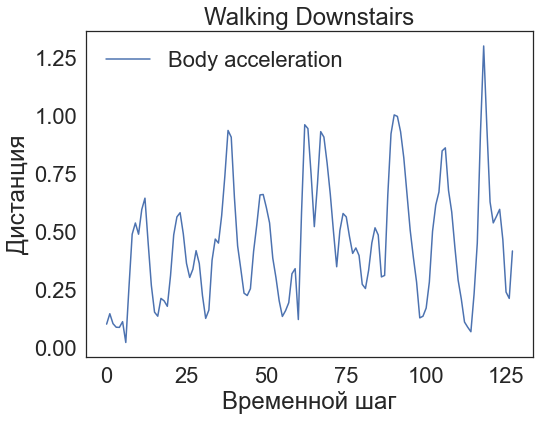

[ 1.808515e-04  1.013856e-02  9.275574e-03  5.065897e-03  1.081025e-02
  4.045101e-03  4.757375e-03  6.213647e-03  3.306744e-03  7.571941e-03
  5.407117e-03  6.221276e-03  6.895028e-03  4.610260e-03  7.331333e-03
  5.077667e-03  5.762556e-03  6.692748e-03  5.443238e-03  8.240952e-03
  6.506451e-03  6.531523e-03  7.422441e-03  5.771769e-03  6.240187e-03
  4.622982e-03  4.832962e-03  5.498746e-03  4.341186e-03  5.098018e-03
  4.268742e-03  3.045187e-03  3.204192e-03  4.520400e-03  5.127211e-03
  3.549791e-03  4.234233e-03  4.468670e-03  3.572702e-03  5.136278e-03
  5.379786e-03  4.408520e-03  2.244039e-03 -1.183598e-03 -6.795342e-04
  2.281389e-03  3.653728e-03  2.312639e-03 -4.042194e-05  5.342254e-04
  2.963263e-03  4.399468e-03  2.702339e-03  3.452310e-04  2.916911e-03
  4.978556e-03  3.446870e-03  4.378151e-03  5.006170e-03  1.996795e-03
 -4.718596e-04 -7.555679e-04 -1.528170e-03 -2.391153e-03  1.093752e-03
  4.550077e-03  2.879173e-03  2.247428e-03  3.304683e-03  2.415886e-03
  1.61

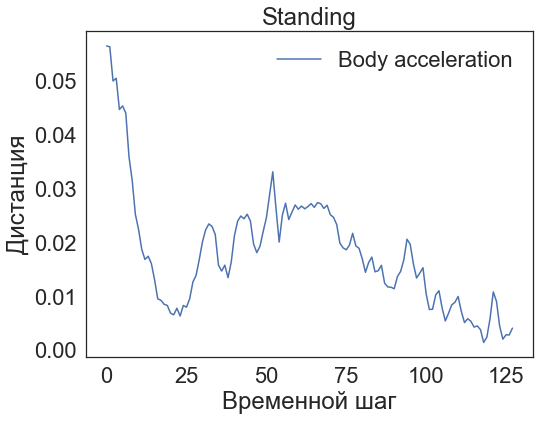

[ 2.838603e-04  1.888066e-03  3.111554e-03  2.223464e-03  5.091188e-03
  5.542471e-03  2.587269e-03  3.390238e-03  3.417396e-03  2.483306e-03
  1.815224e-03 -3.128488e-04  7.152822e-04  3.712699e-03  3.871724e-03
 -3.931966e-04 -5.670828e-03 -3.176834e-03  1.231593e-03 -5.798312e-04
 -2.361944e-03 -4.242843e-03 -4.818230e-03 -2.236822e-03 -1.653895e-03
  5.316018e-04  4.655355e-04 -2.605581e-03  2.550180e-04  9.623778e-04
 -7.883106e-04 -4.688095e-04 -3.511499e-03 -4.555047e-03 -2.419979e-03
 -6.474872e-04  8.914163e-04 -1.167044e-04 -9.941909e-04 -1.211295e-03
 -1.358141e-03 -6.087167e-05 -5.605138e-04 -4.297135e-03 -6.924941e-03
 -1.135136e-03  6.029983e-03  3.068398e-03  1.324383e-03  3.790941e-03
 -4.102192e-04 -4.317212e-03 -3.994936e-03 -3.803919e-03 -2.245195e-03
 -2.463092e-03 -4.454125e-03 -3.843867e-03 -1.789814e-03 -5.727318e-04
 -1.100510e-03 -1.300684e-03 -8.737313e-04 -1.324167e-03 -1.907220e-03
 -2.837155e-03 -3.425420e-03 -3.232729e-03 -1.326950e-03  1.314638e-03
 -1.19

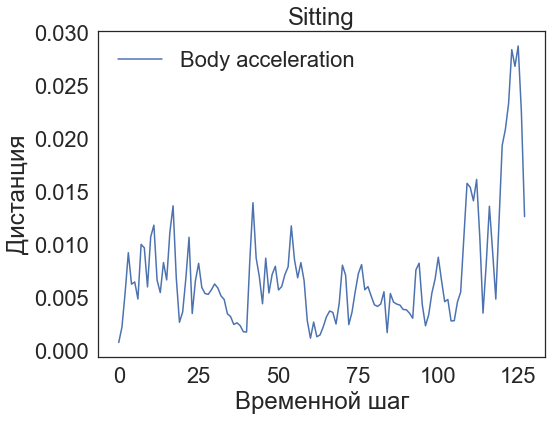

[ 1.303281e-02  1.636038e-02  1.715060e-02  1.555127e-02  1.288962e-02
  7.638211e-03  5.358678e-03  3.693659e-03  1.602201e-03  4.220605e-03
  8.092777e-03  9.353430e-03  9.097029e-03  7.896748e-03  6.110424e-03
  6.082166e-03  6.844015e-03  5.213063e-03  6.913377e-04 -4.457232e-03
 -2.858272e-03  1.974981e-03  1.266560e-03  1.366514e-04 -2.044240e-03
 -5.011690e-03 -1.841287e-03  4.684465e-04 -1.374147e-03 -1.344235e-03
  1.074109e-03  2.854097e-03  1.618896e-03 -6.276606e-04 -3.798748e-03
 -7.279811e-03 -6.272250e-03 -3.877644e-03 -4.086537e-03 -4.900693e-03
 -5.824580e-03 -5.309071e-03 -3.940572e-03 -4.751178e-03 -4.197625e-03
 -2.092246e-03 -2.655380e-03 -4.355113e-03 -5.496617e-03 -3.978302e-03
 -1.633280e-03 -2.894682e-03 -3.127213e-03 -7.717035e-04  2.082583e-03
  5.178056e-03  3.523643e-03 -1.417451e-03 -3.735056e-03 -4.171007e-03
 -6.257846e-03 -1.139937e-02 -1.249907e-02 -7.723988e-03 -1.747055e-03
  7.798045e-03  1.183874e-02  5.742865e-03 -1.374239e-03 -1.302708e-02
 -2.43

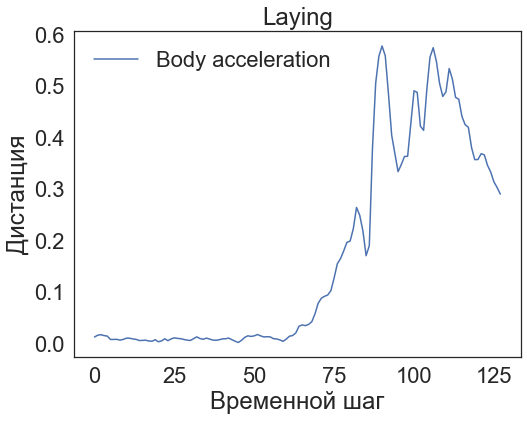

In [39]:
for i in sample:
    distance_viz(i, "Body acceleration")

EDA - Observations by Activity

In [53]:
def y_graph():
    y=pd.DataFrame(np.concatenate((y_train, y_test)), columns=["Activity"])
    y["Activity"]=y.Activity.map(activity)
    sns.set(style="white", font_scale=3)
    f, ax = plt.subplots(figsize=(40,15))
    sns.countplot(data=y, y="Activity")
    plt.title("Observations by Activity")
    plt.show()

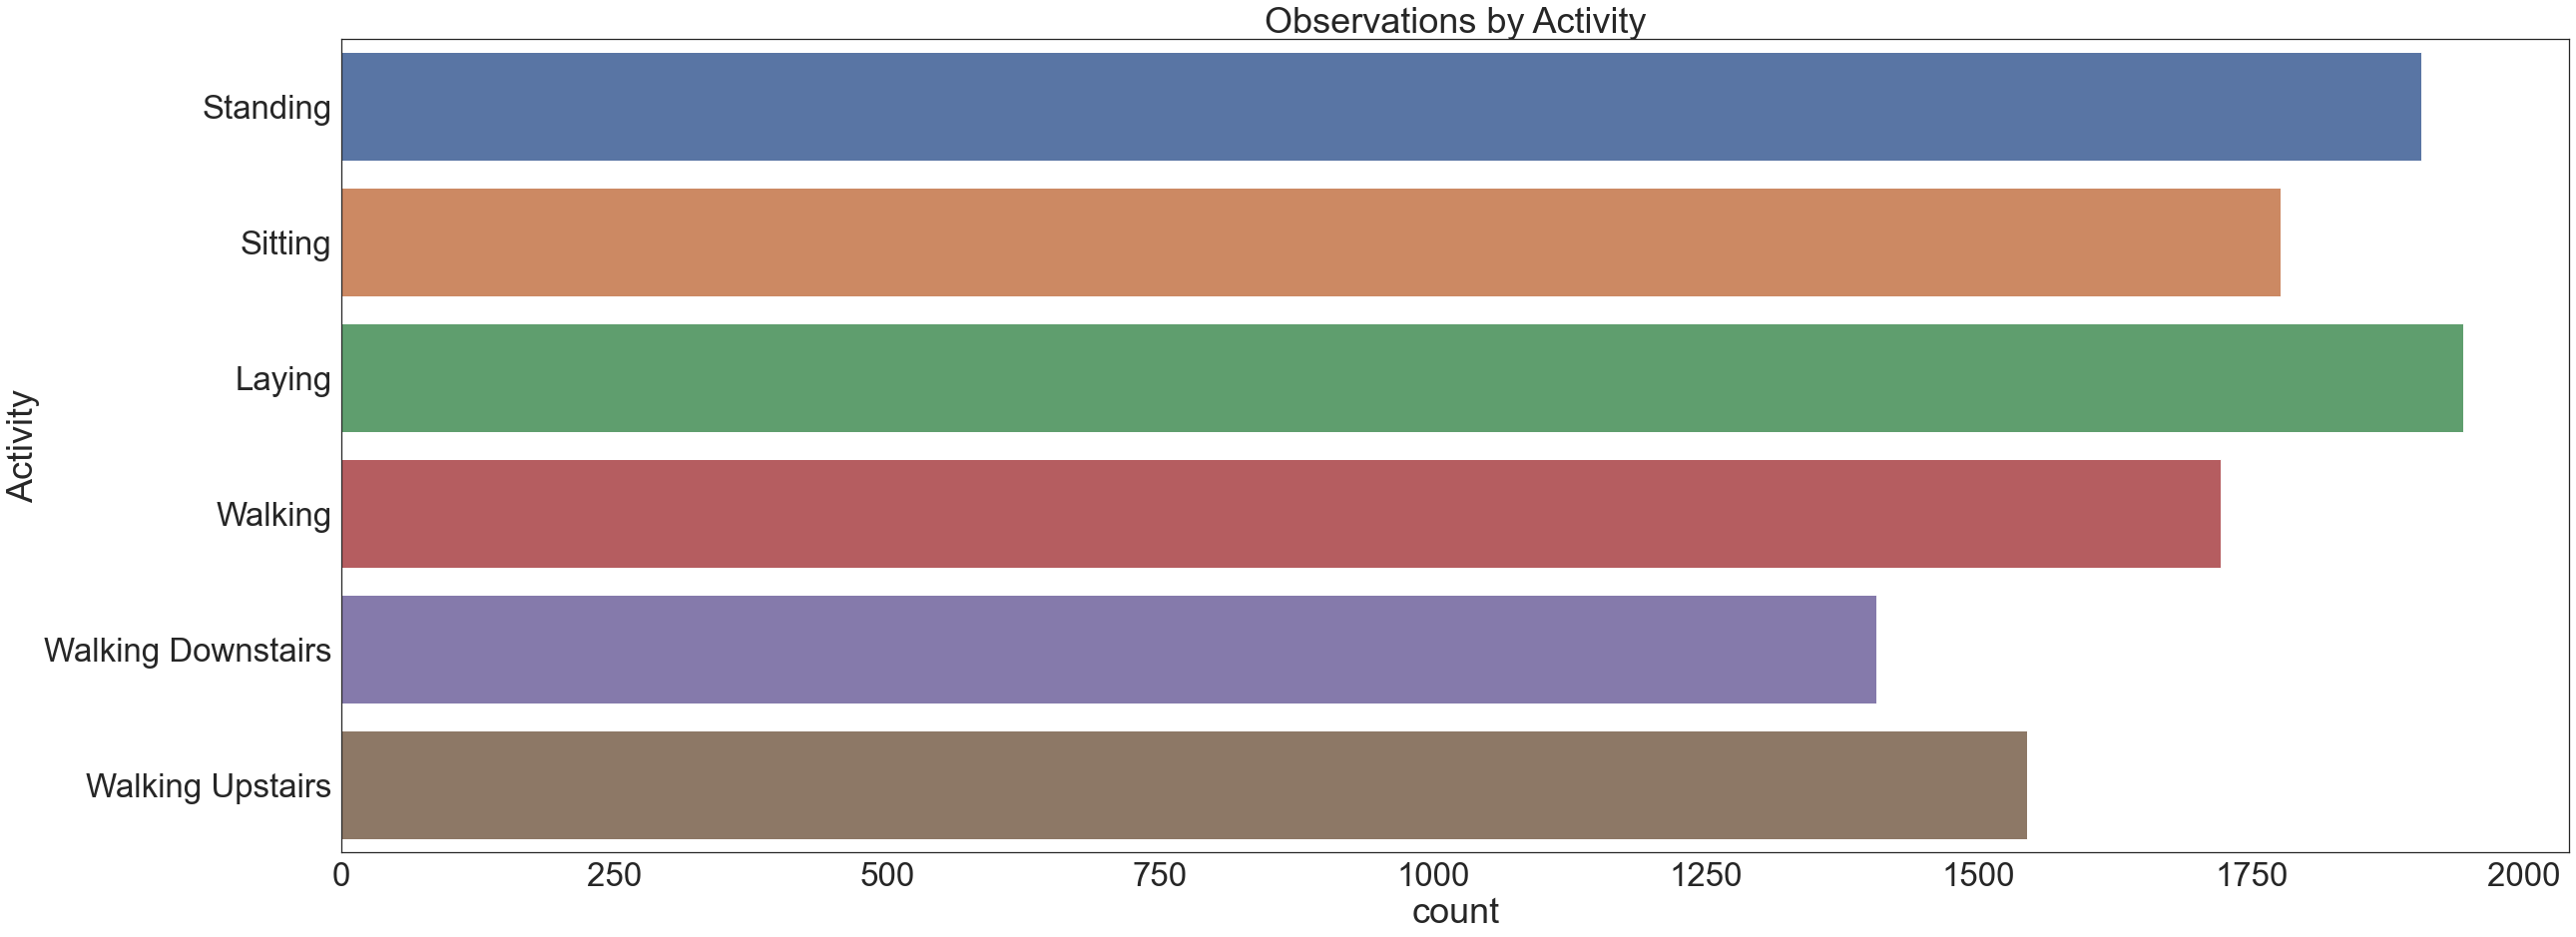

In [54]:
y_graph()

# Human Activity Recognition: CNN-LSTM

In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import ConvLSTM2D
from tensorflow.keras.utils import to_categorical
from keras import backend as K 
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model, model_from_json
from keras.metrics import CategoricalAccuracy, CategoricalCrossentropy
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, auc, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, classification_report

from numpy.random import seed
from tensorflow.random import set_seed



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('UCI_HAR_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

UCI_HAR_Dataset/features.txt
UCI_HAR_Dataset/activity_labels.txt
UCI_HAR_Dataset/features_info.txt
UCI_HAR_Dataset/README.txt
UCI_HAR_Dataset/test/subject_test.txt
UCI_HAR_Dataset/test/X_test.txt
UCI_HAR_Dataset/test/y_test.txt
UCI_HAR_Dataset/test/Inertial Signals/total_acc_y_test.txt
UCI_HAR_Dataset/test/Inertial Signals/total_acc_x_test.txt
UCI_HAR_Dataset/test/Inertial Signals/body_acc_x_test.txt
UCI_HAR_Dataset/test/Inertial Signals/body_acc_y_test.txt
UCI_HAR_Dataset/test/Inertial Signals/body_gyro_y_test.txt
UCI_HAR_Dataset/test/Inertial Signals/body_gyro_x_test.txt
UCI_HAR_Dataset/test/Inertial Signals/total_acc_z_test.txt
UCI_HAR_Dataset/test/Inertial Signals/body_gyro_z_test.txt
UCI_HAR_Dataset/test/Inertial Signals/body_acc_z_test.txt
UCI_HAR_Dataset/UCI_HAR_Dataset/features.txt
UCI_HAR_Dataset/UCI_HAR_Dataset/activity_labels.txt
UCI_HAR_Dataset/UCI_HAR_Dataset/features_info.txt
UCI_HAR_Dataset/UCI_HAR_Dataset/README.txt
UCI_HAR_Dataset/UCI_HAR_Dataset/test/subject_test.txt


In [56]:
activities = {
    1: 'Walking',
    2: 'Walking Upstairs',
    3: 'Walking Downstairs',
    4: 'Sitting',
    5: 'Standing',
    6: 'Laying'
}

In [57]:
# load a single file as a numpy array
def load_file(filepath):
    df = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return df.values

# load a list of files into a 3D array of [observations, timesteps, features(x,y,z)]
def load_group(files, prefix=''):
    loaded = list()
    for f in files:
        data = load_file(prefix + f)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    files = list()
    # body acceleration
    files += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    files += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # total acceleration
    files += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # load input data
    X = load_group(files, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

def load_dataset(prefix=''):
    # load all train
    X_train, y_train = load_dataset_group('train', prefix)
    # load all test
    X_test, y_test = load_dataset_group('test', prefix)
    # zero-offset class values
    y_train = y_train - 1
    y_test = y_test - 1
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    print(f"""Dataset loaded.
Training Set:
X_train {X_train.shape} y_train {y_train.shape}
Test Set:
X_test {X_test.shape} y_test {y_test.shape}""")
    return X_train, y_train, X_test, y_test

In [58]:
def create_model(model):
    classifier = KerasClassifier(model, verbose=2)
    return classifier

In [59]:
# GridSearch
def grid(classifier):
    # define the grid search parameters
    batch_size = [8, 16, 32, 64]
    epochs = [10, 15, 20, 25]
    validation_split=[0.2]
    param_grid = dict(batch_size=batch_size, epochs=epochs, validation_split=validation_split)
    grid = GridSearchCV(estimator=classifier, param_grid=param_grid, n_jobs=-1, cv=5, return_train_score=True, verbose=2)
    grid_result = grid.fit(X_train, y_train)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    return grid_result

In [60]:
def evaluate_model(X_train, y_train, X_test, y_test, params, model):
    epochs, batch_size = params["epochs"], params["batch_size"]
    es =EarlyStopping(monitor='val_loss', patience=5)
    classifier=model()
    history = classifier.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2, validation_split=0.2, callbacks=[es])
    # evaluate model
    _, accuracy = classifier.evaluate( X_test, y_test, batch_size=batch_size, verbose=0)
    return history, accuracy, classifier

In [61]:
def run_model(model, grid_result):
    history, score, classifier = evaluate_model(X_train, y_train, X_test, y_test, grid_result.best_params_, model)
    score = score * 100.0
    print('> %.3f' % (score))
    results=pd.DataFrame(history.history, index=history.epoch)
    return results, classifier

In [62]:
def plot_loss(results):
    plt.style.use('seaborn-whitegrid')
    sns.set(style="white", font_scale = 1.5)
    fig, axes = plt.subplots(1,2, figsize=(20,10), sharex=True)
    axes[0].set_title('Loss')
    axes[0].plot(results['loss'], label='train', )
    axes[0].plot(results['val_loss'], label='test')
    axes[0].legend()
    #plot accuracy during training
    axes[1].set_title('Accuracy')
    axes[1].plot(results['accuracy'], label='train')
    axes[1].plot(results['val_accuracy'], label='test')
    axes[1].legend()
    plt.show()
    return

In [63]:
def run(model):
    classifier=create_model(model)
    grid_result=grid(classifier)
    results, classifier=run_model(model, grid_result)
    plot_loss(results)
    return classifier

In [64]:
X_train, y_train, X_test, y_test = load_dataset(prefix="UCI_HAR_Dataset/")
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

Dataset loaded.
Training Set:
X_train (7352, 128, 9) y_train (7352, 6)
Test Set:
X_test (2947, 128, 9) y_test (2947, 6)


In [65]:
def model1():
    seed(17)
    set_seed(17)
    K.clear_session()
    model = Sequential()
    model.add(LSTM(64, input_shape=(n_timesteps,n_features)))
    model.add(Dropout(0.1))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
    return model

Fitting 5 folds for each of 16 candidates, totalling 80 fits


2021-12-18 17:35:34.171201: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-18 17:35:34.192674: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-18 17:35:34.208629: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

Epoch 1/15
588/588 - 66s - loss: 0.9876 - accuracy: 0.5799 - val_loss: 1.0046 - val_accuracy: 0.6049 - 66s/epoch - 112ms/step
Epoch 1/15
588/588 - 67s - loss: 0.9323 - accuracy: 0.6033 - val_loss: 1.3345 - val_accuracy: 0.5183 - 67s/epoch - 113ms/step
Epoch 1/10
588/588 - 67s - loss: 0.9876 - accuracy: 0.5799 - val_loss: 1.0046 - val_accuracy: 0.6049 - 67s/epoch - 114ms/step
Epoch 1/10
588/588 - 67s - loss: 0.9323 - accuracy: 0.6033 - val_loss: 1.3345 - val_accuracy: 0.5183 - 67s/epoch - 115ms/step
Epoch 1/15
589/589 - 91s - loss: 0.9316 - accuracy: 0.6185 - val_loss: 1.3341 - val_accuracy: 0.5378 - 91s/epoch - 155ms/step
Epoch 1/10
589/589 - 91s - loss: 0.9316 - accuracy: 0.6185 - val_loss: 1.3341 - val_accuracy: 0.5378 - 91s/epoch - 155ms/step
Epoch 1/10
589/589 - 93s - loss: 0.9822 - accuracy: 0.5775 - val_loss: 1.1907 - val_accuracy: 0.5684 - 93s/epoch - 157ms/step
Epoch 1/10
589/589 - 93s - loss: 0.9541 - accuracy: 0.6036 - val_loss: 0.6500 - val_accuracy: 0.7545 - 93s/epoch - 158

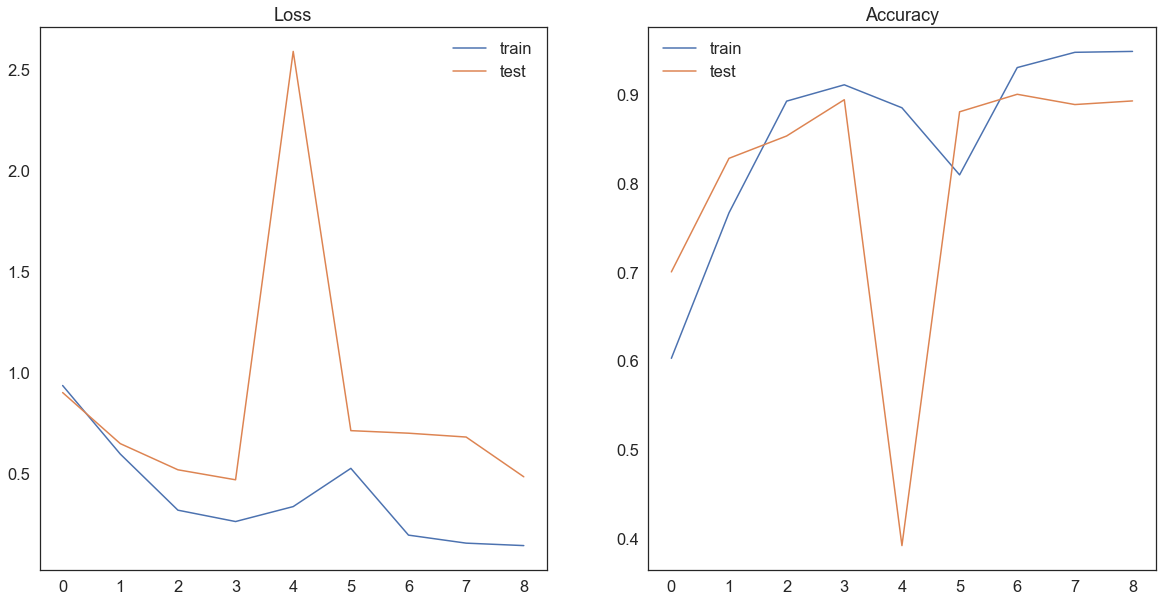

In [66]:
classifier1=run(model1)

CNN Model

In [67]:
def model2():
    seed(17)
    set_seed(17)
    K.clear_session()
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu',input_shape=(n_timesteps, n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Fitting 5 folds for each of 16 candidates, totalling 80 fits


2021-12-18 19:47:24.177643: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-18 19:47:24.180814: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-18 19:47:24.181259: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

Epoch 1/15
588/588 - 16s - loss: 0.3691 - accuracy: 0.8472 - val_loss: 0.6158 - val_accuracy: 0.8777 - 16s/epoch - 26ms/step
Epoch 1/10
588/588 - 16s - loss: 0.3545 - accuracy: 0.8586 - val_loss: 0.4979 - val_accuracy: 0.8564 - 16s/epoch - 26ms/step
Epoch 1/15
588/588 - 16s - loss: 0.3545 - accuracy: 0.8586 - val_loss: 0.4979 - val_accuracy: 0.8564 - 16s/epoch - 27ms/step
Epoch 1/10
588/588 - 16s - loss: 0.3691 - accuracy: 0.8472 - val_loss: 0.6158 - val_accuracy: 0.8777 - 16s/epoch - 27ms/step
Epoch 1/10
589/589 - 16s - loss: 0.3632 - accuracy: 0.8476 - val_loss: 0.4027 - val_accuracy: 0.8539 - 16s/epoch - 27ms/step
Epoch 1/15
589/589 - 16s - loss: 0.3100 - accuracy: 0.8725 - val_loss: 0.5900 - val_accuracy: 0.8437 - 16s/epoch - 28ms/step
Epoch 1/10
589/589 - 16s - loss: 0.3615 - accuracy: 0.8544 - val_loss: 0.5095 - val_accuracy: 0.8420 - 16s/epoch - 28ms/step
Epoch 1/10
589/589 - 16s - loss: 0.3100 - accuracy: 0.8725 - val_loss: 0.5900 - val_accuracy: 0.8437 - 16s/epoch - 28ms/step


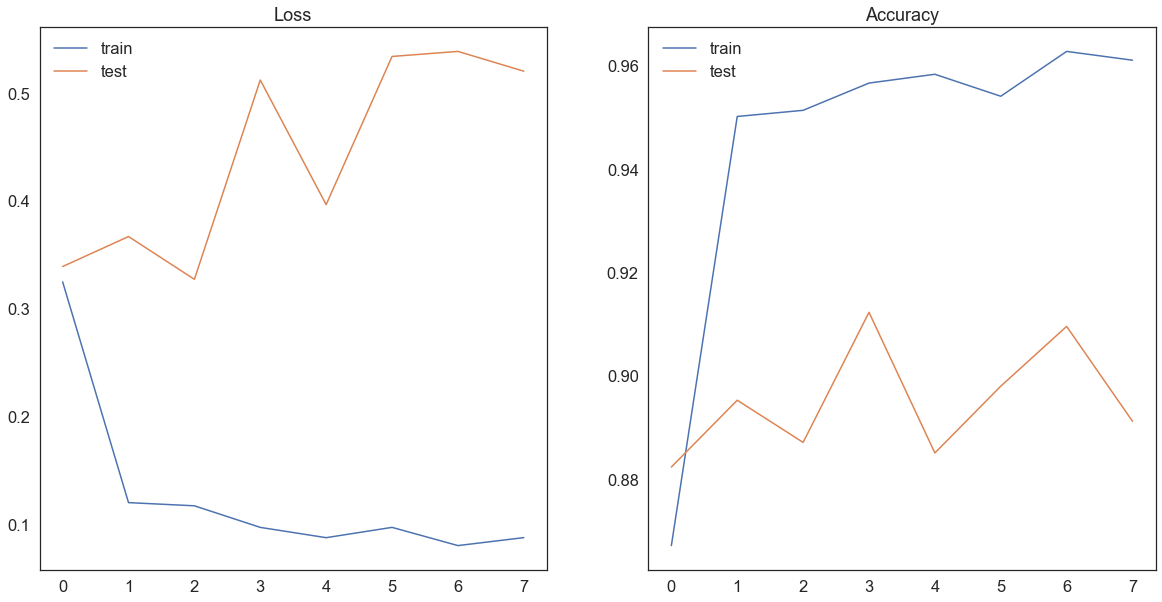

In [68]:
classifier2=run(model2)

In [70]:
# reshape data into time steps of sub-sequences
n_steps, n_length = 4, 32
X_train = X_train.reshape((X_train.shape[0], n_steps, n_length, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_length, n_features))

In [71]:
def model3():
    seed(17)
    set_seed(17)
    K.clear_session()
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Dropout(0.5)))
    model.add(TimeDistributed(Conv1D(filters=128, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Dropout(0.5)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(100))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....batch_size=64, epochs=25, validation_split=0.2; total time= 2.3min
Epoch 1/10
588/588 - 16s - loss: 0.6056 - accuracy: 0.7294 - val_loss: 0.5943 - val_accuracy: 0.8675 - 16s/epoch - 28ms/step
[CV] END .....batch_size=64, epochs=25, validation_split=0.2; total time= 2.1min
Epoch 1/10
588/588 - 16s - loss: 0.6312 - accuracy: 0.7234 - val_loss: 0.6212 - val_accuracy: 0.8683 - 16s/epoch - 28ms/step
[CV] END .....batch_size=64, epochs=25, validation_split=0.2; total time= 1.7min
Epoch 1/10
589/589 - 18s - loss: 0.5467 - accuracy: 0.7696 - val_loss: 0.7804 - val_accuracy: 0.7647 - 18s/epoch - 30ms/step
[CV] END .....batch_size=64, epochs=25, validation_split=0.2; total time= 1.5min
Epoch 1/10
589/589 - 18s - loss: 0.6138 - accuracy: 0.7345 - val_loss: 0.3327 - val_accuracy: 0.8811 - 18s/epoch - 30ms/step
[CV] END .....batch_size=64, epochs=25, validation_split=0.2; total time= 2.1min
Epoch 1/10
589/589 - 18s - loss: 0

2021-12-18 20:17:51.676791: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-18 20:17:51.689364: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-18 20:17:52.386004: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

Epoch 2/10
588/588 - 11s - loss: 0.2488 - accuracy: 0.9077 - val_loss: 0.5853 - val_accuracy: 0.8828 - 11s/epoch - 19ms/step
Epoch 2/10
588/588 - 11s - loss: 0.2854 - accuracy: 0.8922 - val_loss: 0.3641 - val_accuracy: 0.8836 - 11s/epoch - 19ms/step
Epoch 2/10
589/589 - 12s - loss: 0.1903 - accuracy: 0.9296 - val_loss: 0.5634 - val_accuracy: 0.8666 - 12s/epoch - 21ms/step
Epoch 2/10
589/589 - 12s - loss: 0.2218 - accuracy: 0.9120 - val_loss: 0.3867 - val_accuracy: 0.8250 - 12s/epoch - 21ms/step
Epoch 2/10
589/589 - 12s - loss: 0.2245 - accuracy: 0.9135 - val_loss: 0.6563 - val_accuracy: 0.8428 - 12s/epoch - 21ms/step
Epoch 3/10
588/588 - 11s - loss: 0.1548 - accuracy: 0.9428 - val_loss: 0.4110 - val_accuracy: 0.8887 - 11s/epoch - 18ms/step
Epoch 3/10
588/588 - 11s - loss: 0.1598 - accuracy: 0.9360 - val_loss: 0.5319 - val_accuracy: 0.8887 - 11s/epoch - 18ms/step
Epoch 3/10
589/589 - 12s - loss: 0.1207 - accuracy: 0.9518 - val_loss: 0.5625 - val_accuracy: 0.8717 - 12s/epoch - 21ms/step


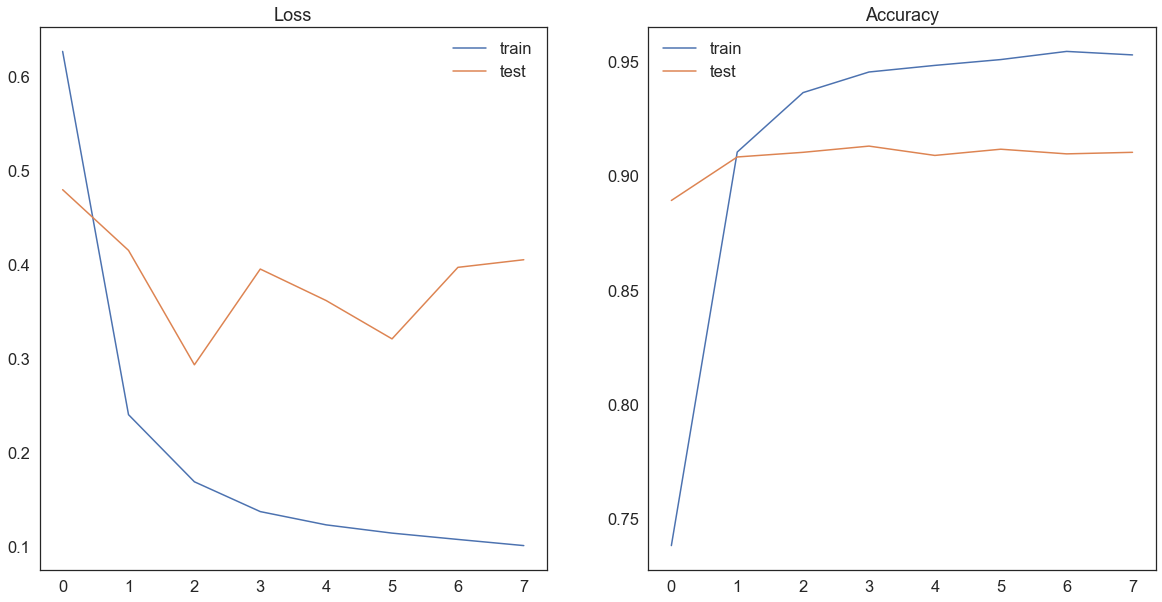

[CV] END .....batch_size=64, epochs=20, validation_split=0.2; total time= 2.9min
[CV] END .....batch_size=64, epochs=20, validation_split=0.2; total time= 2.4min
[CV] END .....batch_size=64, epochs=20, validation_split=0.2; total time= 2.4min
[CV] END .....batch_size=64, epochs=25, validation_split=0.2; total time= 2.9min
[CV] END .....batch_size=64, epochs=25, validation_split=0.2; total time= 2.9min
[CV] END .....batch_size=64, epochs=25, validation_split=0.2; total time= 2.6min
[CV] END .....batch_size=64, epochs=25, validation_split=0.2; total time= 2.6min
[CV] END .....batch_size=64, epochs=25, validation_split=0.2; total time= 2.4min


In [73]:
classifier3=run(model3)